# Machine Learning Pipeline

1. Data ingestion.
2. EDA
3. Preprocessing / Feature engineering
4. Model building
5. Evaluation of model

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [50]:
df = pd.read_csv("placement.csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [51]:
# Checking the relationship between dependent and independent features.

Text(0, 0.5, 'Package')

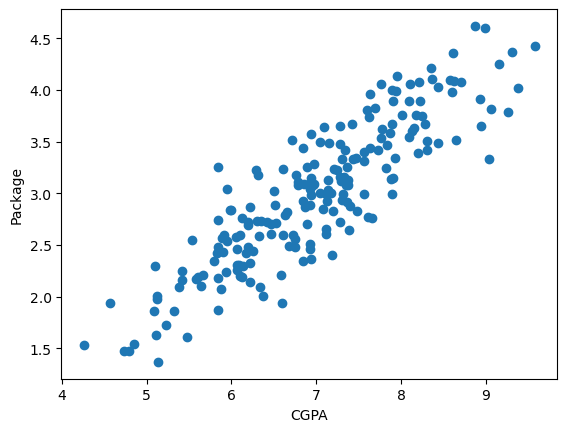

In [52]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel("CGPA")
plt.ylabel("Package")

In [53]:
# Segregating independent and dependent features

In [54]:
X =  df.iloc[:,0:1]
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [55]:
y = df.iloc[:,1]
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [56]:
# Splitting into train and split using random sampling

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=42) # 15 percent of data for testing

In [58]:
X_train

,cgpa
9,8.31
18,6.94
55,8.20
75,6.97
150,6.30
...,...
106,6.13
14,7.73
92,7.90
179,7.14


In [59]:
y_train

9      3.51
18     2.98
55     3.39
75     3.28
150    2.73
       ... 
106    2.19
14     3.42
92     4.00
179    3.03
102    1.37
Name: package, Length: 170, dtype: float64

In [60]:
X_test

,cgpa
95,6.63
15,7.25
30,7.36
158,5.95
128,7.93
115,8.35
69,7.30
170,6.22
174,7.32
45,7.87


In [61]:
X_train.shape

(170, 1)

In [62]:
y_train.shape

(170,)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
model = LinearRegression()

In [66]:
model.fit(X_train,y_train)

LinearRegression()

In [67]:
model.score(X_train,y_train)

0.7741811633951949

In [68]:
y_pred = model.predict(X_test)
y_pred

array([2.78511178, 3.13682871, 3.1992301 , 2.39935773, 3.52258277,
       3.76084262, 3.16519298, 2.55252478, 3.17653869, 3.48854564,
       1.92283802, 2.35964775, 3.68142267, 2.76242037, 3.47152708,
       3.04606305, 2.33695634, 3.20490296, 2.18946214, 3.31268718,
       2.46175912, 2.90424171, 3.31836003, 2.87587744, 3.33537859,
       2.2064807 , 1.44064545, 2.71703754, 3.18221154, 2.33695634])

In [69]:
y_test

95     2.79
15     3.23
30     3.26
158    3.04
128    3.34
115    4.21
69     2.94
170    2.87
174    2.99
45     3.58
66     1.63
182    2.08
165    4.08
78     2.21
186    3.47
177    3.64
56     2.74
152    3.08
82     2.17
68     2.99
124    2.31
16     2.35
148    3.40
93     3.08
65     3.81
60     2.19
84     1.53
67     2.89
125    3.16
132    2.48
Name: package, dtype: float64

In [70]:
from sklearn.metrics import r2_score

In [71]:
r2_score(y_test,y_pred)

0.7804129897987836

In [72]:
model.coef_

array([0.56728537])

In [73]:
model.intercept_

-0.975990235442223

In [75]:
model.predict([[7.8]]) # For cgpa of 7.8, the package will be 3.448

/Users/deepjyotibhattacharjee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.44883567])

In [76]:
model.predict([[9.6]])

/Users/deepjyotibhattacharjee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.46994934])

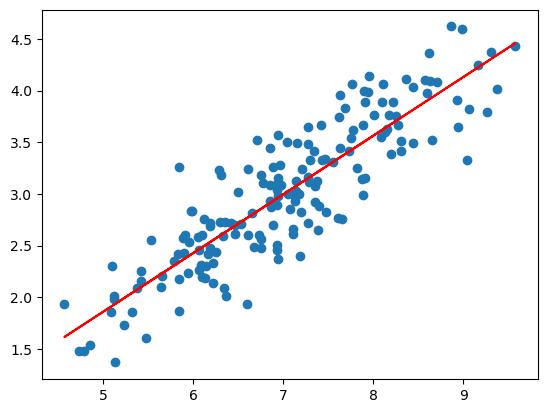

In [78]:
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train),color="red")